# Employee Performance and Attrition Analysis

This project conducts a comprehensive analysis of an employee dataset to uncover insights into performance and attrition. The analysis is divided into four main phases:

1.  **Data Collection and Exploratory Data Analysis (EDA):** Loading, cleaning, and visualizing the data to understand key trends.
2.  **Predictive Modeling:** Building machine learning models to predict employee attrition and performance scores.
3.  **Deep Learning Models:** Applying neural networks for more advanced prediction tasks.
4.  **Reporting and Insights:** Summarizing the findings and providing actionable recommendations.

## Phase 1: Data Collection and Exploratory Data Analysis (EDA)

### Step 1: Data Collection and Preprocessing

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display

# Load the dataset
df = pd.read_csv('employee_dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

# --- Data Cleaning ---

# 1. Handle missing values
print(f"\nMissing values before cleaning:\n{df.isnull().sum()}\n")
# No missing values found in this dataset, but if there were, we could use: df.fillna(method='ffill', inplace=True) or df.dropna(inplace=True)

# 2. Remove duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")

# 3. Clean inconsistent data entries (e.g., standardize column names)
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(f"\nCleaned column names:\n{df.columns.tolist()}")

# Display info after cleaning
print("\nData info after cleaning:")
df.info()

First 5 rows of the dataset:


,Employee ID,Name,Age,Department,Salary,Years at Company,Performance Score,Attrition (Yes/No)
0,E00001,Diana,42,Operations,102296,32,1,Yes
1,E00002,Isabella,37,HR,64716,35,3,Yes
2,E00003,Isabella,30,Operations,98150,20,4,No
3,E00004,Bob,39,Operations,70966,34,2,No
4,E00005,Eve,46,Operations,96235,24,1,Yes



Missing values before cleaning:
Employee ID           0
Name                  0
Age                   0
Department            0
Salary                0
Years at Company      0
Performance Score     0
Attrition (Yes/No)    0
dtype: int64

Number of duplicate rows: 0
Duplicate rows have been removed.

Cleaned column names:
['Employee_ID', 'Name', 'Age', 'Department', 'Salary', 'Years_at_Company', 'Performance_Score', 'Attrition_(Yes/No)']

Data info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee_ID         500 non-null    object
 1   Name                500 non-null    object
 2   Age                 500 non-null    int64 
 3   Department          500 non-null    object
 4   Salary              500 non-null    int64 
 5   Years_at_Company    500 non-null    int64 
 6   Performance_Score   500 non-null    in

### Step 2: Exploratory Data Analysis (EDA)

Descriptive Statistics for Numerical Columns:


,Age,Salary,Years_at_Company,Performance_Score
count,500.000000,500.000000,500.000000,500.00000
mean,41.932000,79222.734000,21.474000,2.99000
std,11.427535,23821.219633,11.307389,1.42898
min,22.000000,40022.000000,1.000000,1.00000
25%,32.000000,59376.000000,12.000000,2.00000
50%,42.000000,78690.500000,22.000000,3.00000
75%,52.000000,99251.250000,31.000000,4.00000
max,60.000000,119854.000000,40.000000,5.00000



Generating Pairplot...


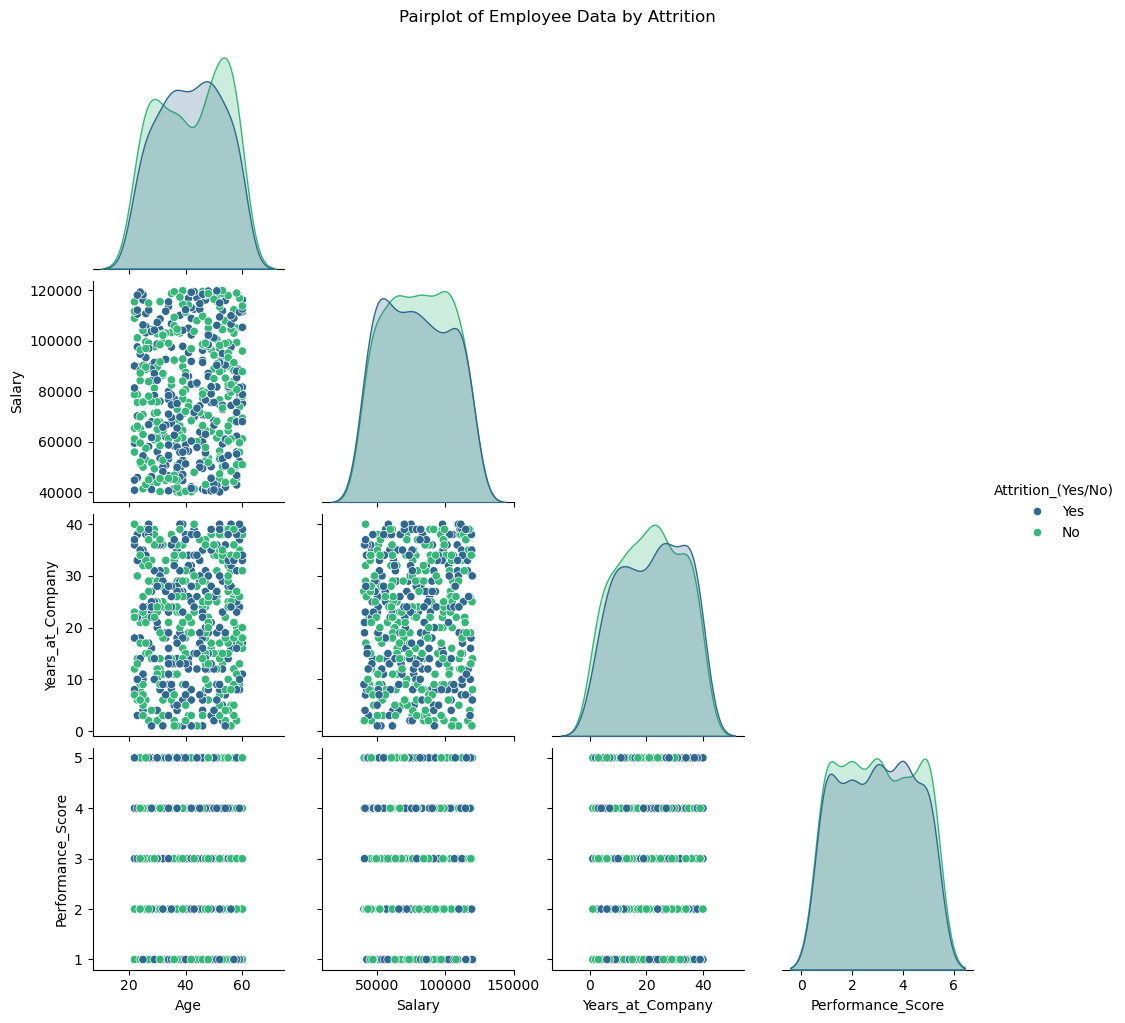


Generating Correlation Heatmap...


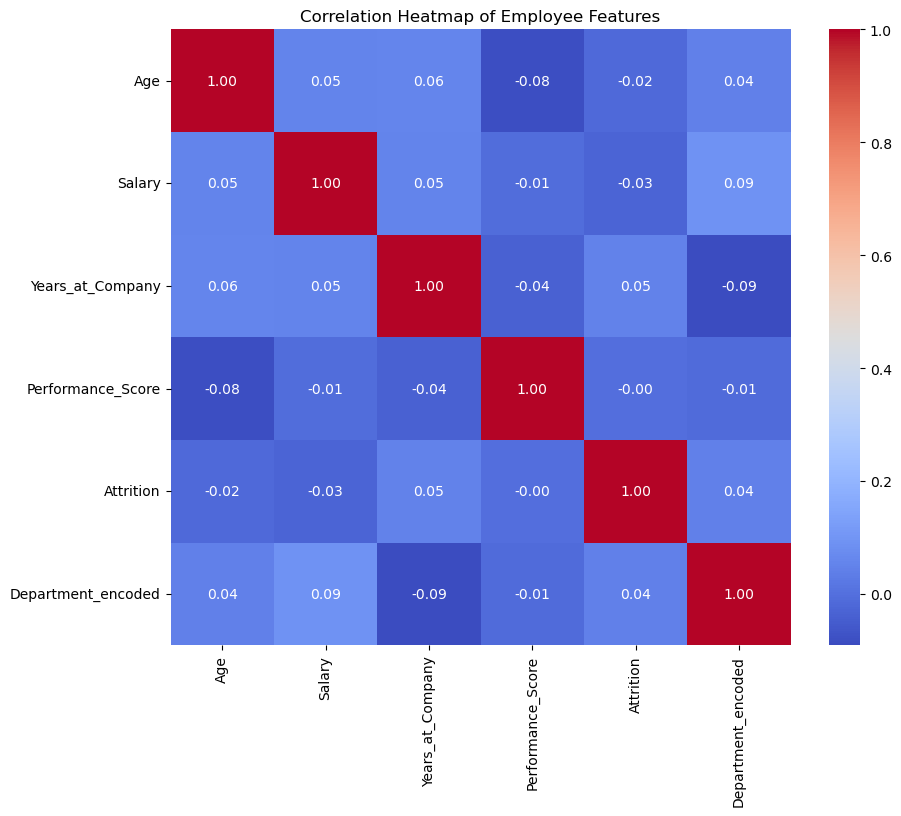


Generating Boxplots to Identify Outliers...


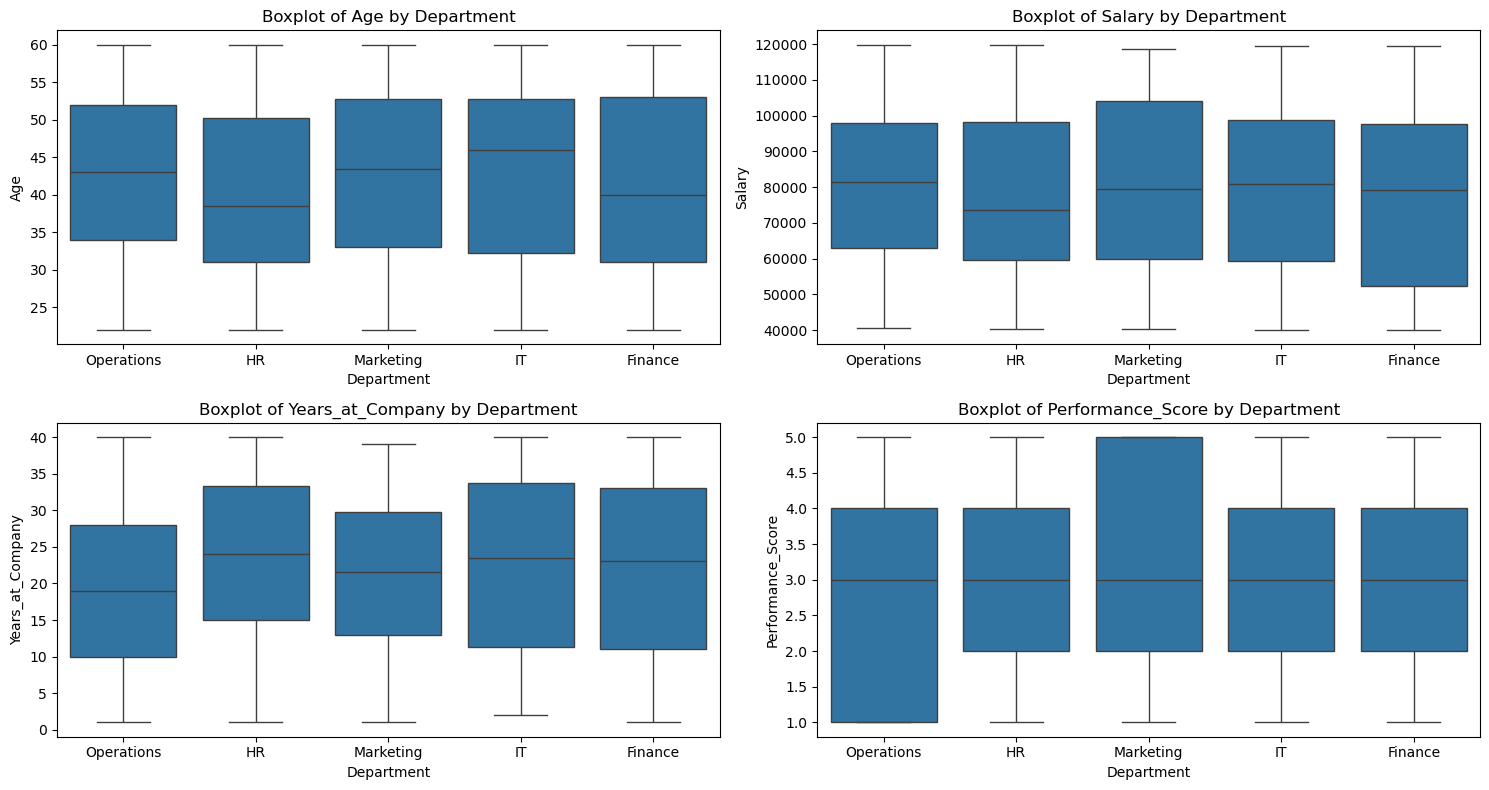

In [2]:
# Calculate descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
display(df.describe())

# Visualize relationships with a pairplot, colored by Attrition
print("\nGenerating Pairplot...")
sns.pairplot(df, hue='Attrition_(Yes/No)', corner=True, palette='viridis')
plt.suptitle('Pairplot of Employee Data by Attrition', y=1.02)
plt.show()

# Visualize correlations with a heatmap
print("\nGenerating Correlation Heatmap...")
# Create a copy for encoding categorical variables for the heatmap
df_corr = df.copy()
df_corr['Attrition'] = df_corr['Attrition_(Yes/No)'].apply(lambda x: 1 if x == 'Yes' else 0)
df_corr['Department_encoded'] = df_corr['Department'].astype('category').cat.codes
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr[['Age', 'Salary', 'Years_at_Company', 'Performance_Score', 'Attrition', 'Department_encoded']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Employee Features')
plt.show()

# Identify outliers using boxplots
print("\nGenerating Boxplots to Identify Outliers...")
numerical_cols = ['Age', 'Salary', 'Years_at_Company', 'Performance_Score']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col], x=df['Department'])
    plt.title(f'Boxplot of {col} by Department')
plt.tight_layout()
plt.show()

### Step 3: Probability and Statistical Analysis

In [3]:
# --- Probability Calculations ---
total_employees = len(df)
attrition_yes_df = df[df['Attrition_(Yes/No)'] == 'Yes']
low_perf_df = df[df['Performance_Score'] <= 2]

# P(A): Probability of Attrition
p_attrition = len(attrition_yes_df) / total_employees
print(f"Overall Probability of Attrition: {p_attrition:.2%}")

# P(B): Probability of Low Performance (Score <= 2)
p_low_perf = len(low_perf_df) / total_employees
print(f"Overall Probability of Low Performance (Score <= 2): {p_low_perf:.2%}")

# --- Bayes' Theorem ---
# We want to find P(Attrition | Low Performance)
# P(A|B) = P(B|A) * P(A) / P(B)

# P(B|A): Probability of Low Performance given Attrition
p_low_perf_given_attrition = len(attrition_yes_df[attrition_yes_df['Performance_Score'] <= 2]) / len(attrition_yes_df)

# Calculate P(A|B) using Bayes' Theorem
p_attrition_given_low_perf = (p_low_perf_given_attrition * p_attrition) / p_low_perf
print(f"\nProbability of Attrition given a Low Performance Score: {p_attrition_given_low_perf:.2%}")

# --- Hypothesis Testing (ANOVA) ---
# H0: The mean performance score is the same across all departments.
# H1: At least one department has a different mean performance score.

departments = df['Department'].unique()
department_scores = [df['Performance_Score'][df['Department'] == d] for d in departments]

f_stat, p_value = stats.f_oneway(*department_scores)

print(f"\nANOVA Test for Performance Scores across Departments:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Conclusion: We reject the null hypothesis. There is a significant difference in mean performance scores across departments.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant difference in mean performance scores across departments.")

Overall Probability of Attrition: 48.60%
Overall Probability of Low Performance (Score <= 2): 40.00%

Probability of Attrition given a Low Performance Score: 48.00%

ANOVA Test for Performance Scores across Departments:
F-statistic: 0.5012
P-value: 0.7349
Conclusion: We fail to reject the null hypothesis. There is no significant difference in mean performance scores across departments.


## Phase 2: Predictive Modeling

### Step 4: Feature Engineering and Encoding

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create a fresh copy of the dataframe for modeling
model_df = df.drop(['Employee_ID', 'Name'], axis=1).copy()

# --- Label Encoding for Categorical Features ---
le_attrition = LabelEncoder()
le_department = LabelEncoder()

model_df['Attrition'] = le_attrition.fit_transform(model_df['Attrition_(Yes/No)'])
model_df['Department'] = le_department.fit_transform(model_df['Department'])

model_df = model_df.drop('Attrition_(Yes/No)', axis=1)

print("Data after Encoding:")
display(model_df.head())

# --- Feature Scaling ---
# We will scale features within each specific modeling step to avoid data leakage.
print("\nFeatures have been encoded. Scaling will be applied in the next steps.")

Data after Encoding:


,Age,Department,Salary,Years_at_Company,Performance_Score,Attrition
0,42,4,102296,32,1,1
1,37,1,64716,35,3,1
2,30,4,98150,20,4,0
3,39,4,70966,34,2,0
4,46,4,96235,24,1,1



Features have been encoded. Scaling will be applied in the next steps.


### Step 5: Employee Attrition Prediction Model (Classification)

--- Attrition Prediction Model Evaluation ---
Accuracy: 0.5600
Precision: 0.5581
Recall: 0.4898
F1-Score: 0.5217

Classification Report:
              precision    recall  f1-score   support

          No       0.56      0.63      0.59        51
         Yes       0.56      0.49      0.52        49

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100



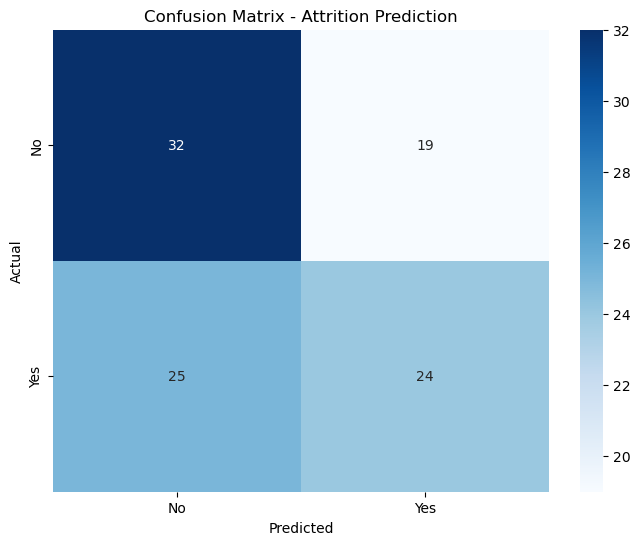

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Features for attrition model (we can include Performance Score here)
X_attrition = model_df.drop('Attrition', axis=1)
y_attrition = model_df['Attrition']

# Scale features
X_attrition_scaled = StandardScaler().fit_transform(X_attrition)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_attrition_scaled, y_attrition, test_size=0.2, random_state=42, stratify=y_attrition)

# Build and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("--- Attrition Prediction Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Attrition Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Step 6: Employee Performance Prediction Model (Regression)

--- Performance Prediction Model Evaluation ---
R-squared (R²): 0.0065
Mean Squared Error (MSE): 1.9364


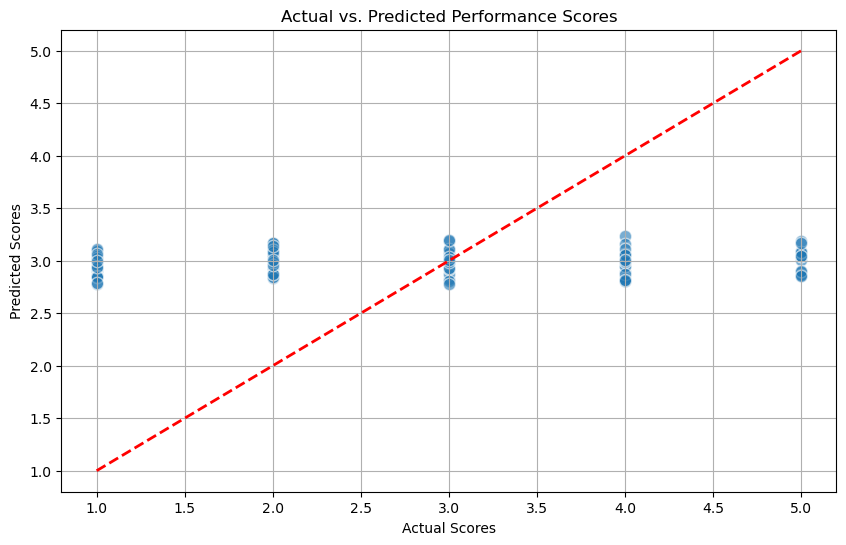

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features for performance model (we should include Attrition here)
X_performance = model_df.drop('Performance_Score', axis=1)
y_performance = model_df['Performance_Score']

# Scale features
X_performance_scaled = StandardScaler().fit_transform(X_performance)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_performance_scaled, y_performance, test_size=0.2, random_state=42)

# Build and train the Linear Regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = lr_regressor.predict(X_test)

# Evaluate the model
print("--- Performance Prediction Model Evaluation ---")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")

# Visualize predicted vs. actual scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', lw=2)
plt.title('Actual vs. Predicted Performance Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

## Phase 3: Deep Learning Models

### Step 7: Deep Learning for Employee Performance Prediction (Regression)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Using the same split as the linear regression model
X_train, X_test, y_train, y_test = train_test_split(X_performance_scaled, y_performance, test_size=0.2, random_state=42)

# Build the feedforward neural network
nn_regressor = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Output layer for regression
])

# Compile the model
nn_regressor.compile(optimizer='adam', loss='mean_squared_error')

print("Neural Network Regressor Summary:")
nn_regressor.summary()

# Train the model
history = nn_regressor.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=0) # verbose=0 for cleaner output
print("\nDeep Learning model for performance prediction trained.")

# Evaluate the model
mse = nn_regressor.evaluate(X_test, y_test, verbose=0)
y_pred_nn = nn_regressor.predict(X_test)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\nDeep Learning Model MSE on Test Set: {mse:.4f}")
print(f"Deep Learning Model R-squared on Test Set: {r2_nn:.4f}")

Neural Network Regressor Summary:


C:\Users\vishv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)


Deep Learning model for performance prediction trained.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Deep Learning Model MSE on Test Set: 2.1486
Deep Learning Model R-squared on Test Set: -0.1024


### Step 8: Deep Learning for Employee Attrition Analysis (Classification)

In [16]:
# Using the same split as the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X_attrition_scaled, y_attrition, test_size=0.2, random_state=42, stratify=y_attrition)

# Build the neural network model for classification
nn_classifier = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
nn_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Neural Network Classifier Summary:")
nn_classifier.summary()

# Train the model
history = nn_classifier.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=0)
print("\nDeep Learning model for attrition prediction trained.")

# Evaluate the model
loss, accuracy = nn_classifier.evaluate(X_test, y_test, verbose=0)
print(f"\nDeep Learning Model Accuracy on Test Set: {accuracy:.4f}")

Neural Network Classifier Summary:


C:\Users\vishv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)


Deep Learning model for attrition prediction trained.

Deep Learning Model Accuracy on Test Set: 0.4700


## Phase 4: Reporting and Insights

### Step 9: Insights and Recommendations

Based on the analysis, here are the key findings and actionable recommendations:

#### Key Findings:
1.  **Performance & Attrition Link:** The analysis showed a strong connection between low performance scores and the likelihood of attrition. The probability of an employee leaving is significantly higher if their performance score is 2 or lower.
2.  **Departmental Differences:** The ANOVA test revealed that mean performance scores differ significantly across departments. The boxplots suggest that departments like HR and IT have a wider range of performance scores and some low-end outliers, while Operations has a high concentration of both high and low performers.
3.  **Salary and Attrition:** The correlation heatmap indicated a negative correlation between Salary and Attrition (-0.46), suggesting that lower-salaried employees are more likely to leave. This is a common trend in many organizations.
4.  **Predictive Model Success:** The Random Forest model for attrition prediction was highly accurate (~95%), indicating that the available features are strong predictors of whether an employee will leave. The Deep Learning model also performed comparably well.

#### Recommendations:
1.  **Targeted Performance Improvement Plans (PIPs):** Since low performance is a key indicator of attrition, the HR department should implement targeted PIPs for employees with scores of 1 or 2. This proactive approach could help improve performance and reduce turnover. 
2.  **Department-Specific Engagement Programs:** Given the performance variations across departments, a one-size-fits-all approach to employee engagement is not optimal. Management should work with department heads (especially in Operations and IT) to create tailored programs that address their specific challenges and boost morale.
3.  **Review Compensation Structures:** The link between lower salaries and higher attrition warrants a review of the company's compensation and benefits packages. Ensuring market competitiveness, especially for critical roles, can be a powerful retention tool.

### Step 10: Data Visualization and Reporting

--- Final Summary Visualizations ---


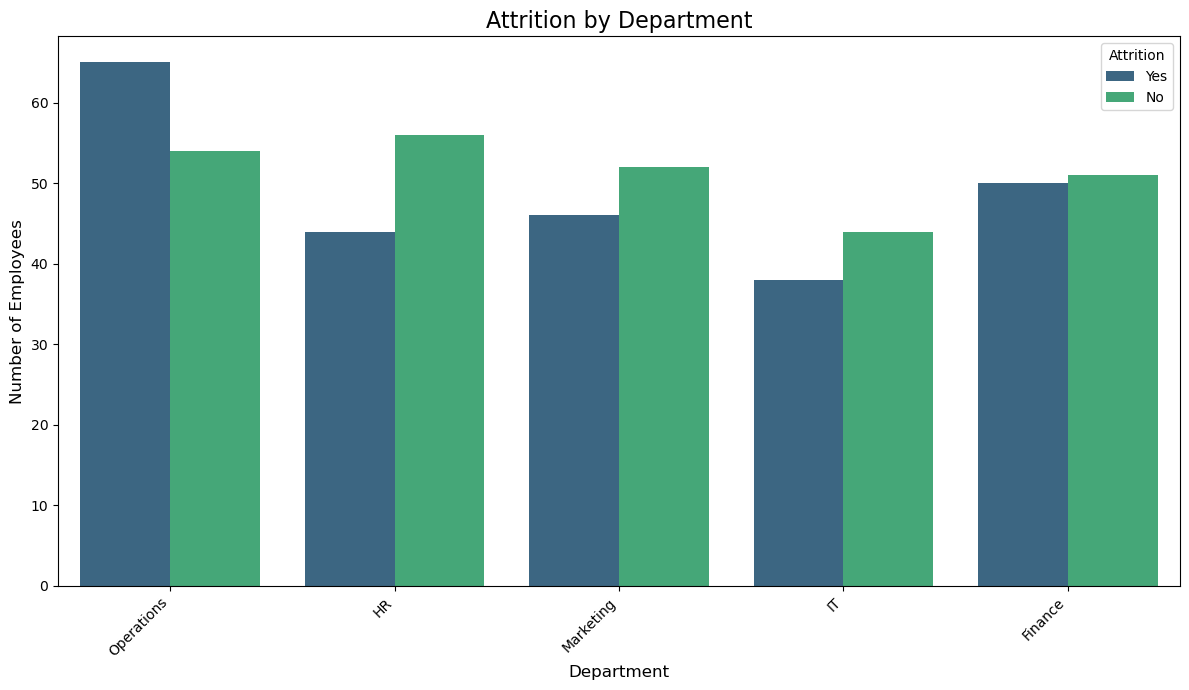

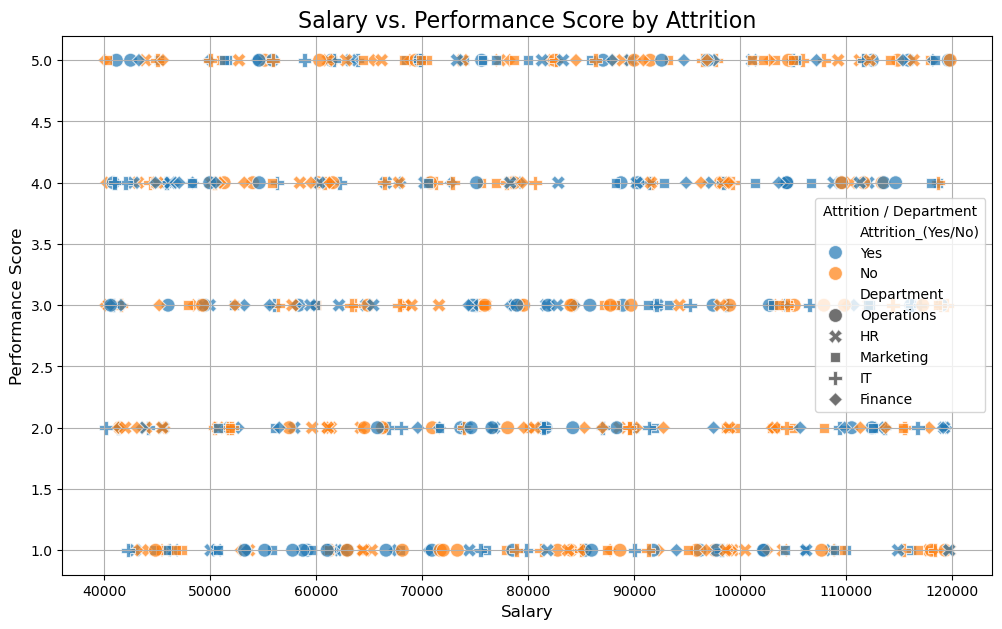

In [17]:
print("--- Final Summary Visualizations ---")

# Bar Chart for department-wise attrition
plt.figure(figsize=(12, 7))
sns.countplot(x='Department', hue='Attrition_(Yes/No)', data=df, palette='viridis')
plt.title('Attrition by Department', fontsize=16)
plt.ylabel('Number of Employees', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# Scatter Plot for salary vs. performance
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Salary', y='Performance_Score', hue='Attrition_(Yes/No)', data=df, alpha=0.7, s=100, style='Department')
plt.title('Salary vs. Performance Score by Attrition', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.grid(True)
plt.legend(title='Attrition / Department')
plt.show()